In [ ]:
import pandas as pd

try:
    df = pd.read_csv("electricity_bill_dataset.csv")
    print(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(df)

#a
# EDA
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())

# Drop MotorPump as it has all zeros
df = df.drop('MotorPump', axis=1)

Data shape: (45345, 12)

Data types:
 Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Month                int64
City                object
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
dtype: object

Missing values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

Descriptive statistics:
                 Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.8

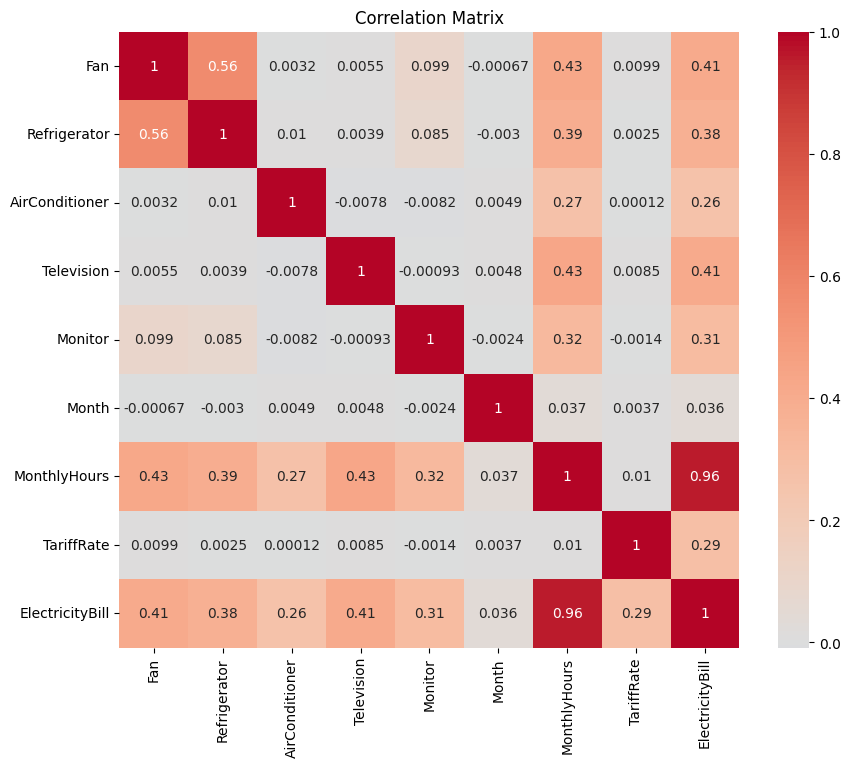

In [ ]:
#b
# Calculate correlation matrix
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

c) From the correlation matrix, we can see that MonthlyHours has the highest correlation with ElectricityBill (target variable Y).

In [ ]:
correlation = df[['MonthlyHours', 'ElectricityBill']].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation:.4f}")

Correlation coefficient: 0.9587


In [ ]:
#d
X = df['MonthlyHours'].values
y = df['ElectricityBill'].values

n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(y)

numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)

b1 = numerator / denominator
b0 = y_mean - b1 * x_mean

print(f"Manual calculation - Slope (b1): {b1:.4f}, Intercept (b0): {b0:.4f}")

Manual calculation - Slope (b1): 8.3963, Intercept (b0): -13.0188


In [ ]:
#e
class SimpleLinearRegression:
    def __init__(self):
        self.b0 = None
        self.b1 = None

    def fit(self, X, y):
        n = len(X)
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)

        self.b1 = numerator / denominator
        self.b0 = y_mean - self.b1 * x_mean

    def predict(self, X):
        return self.b0 + self.b1 * X

slr = SimpleLinearRegression()
slr.fit(X, y)
print(f"From scratch implementation - Slope: {slr.b1:.4f}, Intercept: {slr.b0:.4f}")

From scratch implementation - Slope: 8.3963, Intercept: -13.0188


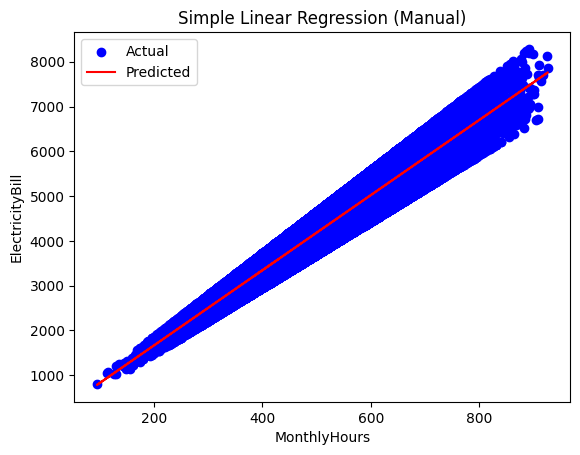

In [ ]:
#f
y_pred_manual = b0 + b1 * X


plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred_manual, color='red', label='Predicted')
plt.xlabel('MonthlyHours')
plt.ylabel('ElectricityBill')
plt.title('Simple Linear Regression (Manual)')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = np.array([384, 488, 416, 475, 457])
y = np.array([3225.6, 3806.4, 3203.2, 4370.0, 4204.4])

b1_manual = 9.9843
b0_manual = -671.11
y_pred_manual = b0_manual + b1_manual * X

X_sklearn = X.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_sklearn, y)
y_pred_sklearn = lr.predict(X_sklearn)

print(f"Manual coefficients: b0 = {b0_manual:.4f}, b1 = {b1_manual:.4f}")
print(f"Scikit-learn coefficients: b0 = {lr.intercept_:.4f}, b1 = {lr.coef_[0]:.4f}")

mse_manual = mean_squared_error(y, y_pred_manual)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"\nMSE (Manual): {mse_manual:.4f}")
print(f"MSE (Scikit-learn): {mse_sklearn:.4f}")
print(f"Difference: {abs(mse_manual - mse_sklearn):.10f}")

Manual coefficients: b0 = -671.1100, b1 = 9.9843
Scikit-learn coefficients: b0 = -671.1190, b1 = 9.9843

MSE (Manual): 84933.9314
MSE (Scikit-learn): 84933.9314
Difference: 0.0000013708
